# Counterfactual Explanations with Native Guides 

*Notebook by Alan Paredes*

In this Notebook, I will go through the steps to create a FCN model, train it, generate the Class Activation Maps, and finally generate instance-based counterfactual explanations as proposed by E. Delany et al (2021). 

A link to E.Delany et al work (Instance-Based Counterfactual Explanations for Time Series Classification) can be found [here](https://link.springer.com/chapter/10.1007/978-3-030-86957-1_3#Sec4). 

### Import Libraries

In [1]:
from Models.classifiers import fcn
from Counterfactuals.CAM import cam_univariate
from Counterfactuals.utils.counterfactual_utils import ucr_data_loader
from tslearn.datasets import UCR_UEA_datasets
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
from Counterfactuals.Native_Guides import native_guides

Instructions for updating:
non-resource variables are not supported in the long term


## Load Dataset

For this example, I will be using the Cylinder-Bell-Funnel data from the UCR Archive. This dataset properties are the following:
- Training size: 30 rows. 
- Testing size: 900 rows.
- Timeseries length: 128 timesteps.
- Number of Classes: 3 (Cylinder, Bell, Funnel).
- Type of timeseries: Univariate.

In [2]:
dataset = "Chinatown"

In [3]:
X_train, y_train, X_test, y_test = ucr_data_loader(dataset)
input_shape = X_train.shape[1:] #The input shape for our CNN should be (timesteps, dimensions)
nb_classes = len(np.unique(np.concatenate([y_train,y_test])))
#One Hot the labels for the CNN
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

## Create a Fully Convolutional Network

This architecture was proposed in the paper **Time series classification from scratch with deep neural networks: A strong baseline** by Wang et al (2017).

In [4]:
model = fcn.Classifier_FCN(
    output_directory="/Users/alanparedescetina/Tesis/Models/",
    input_shape=input_shape,
    nb_classes= nb_classes,
    dataset_name=dataset,
    verbose=True
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 24, 128)           1152      
                                                                 
 batch_normalization (Batch  (None, 24, 128)           512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 24, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 256)           164096    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 256)           1024      
 chNormalization)                                            

2024-02-29 09:54:58.894901: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-02-29 09:54:58.984879: W tensorflow/c/c_api.cc:304] Operation '{name:'conv1d_2/kernel/Assign' id:238 op device:{requested: '', assigned: ''} def:{{{node conv1d_2/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv1d_2/kernel, conv1d_2/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [6]:
model.fit(X_train,y_train, X_test, y_test)

Train on 20 samples, validate on 343 samples
Epoch 1/2000


2024-02-29 09:55:32.859321: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_2/cond_3/Merge' id:329 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_2/cond_3/Merge}} = Merge[N=2, T=DT_FLOAT, _has_manual_control_dependencies=true](batch_normalization_2/cond_3/ReadVariableOp_1, batch_normalization_2/cond_3/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-02-29 09:55:32.945650: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Adam/conv1d_1/kernel/v/Assign' id:958 op device:{requested: '', assigned: ''} def:{{{node training/Adam/conv1d_1/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/conv1d_1/kernel/v, training/Adam/conv1d_1/kernel/v/Initializer/zeros)}}' was changed by setting att

 2/20 [==>...........................] - ETA: 2s - loss: 0.7196 - acc: 0.0000e+00

/Users/alanparedescetina/Library/Python/3.8/lib/python/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-02-29 09:55:33.300044: W tensorflow/c/c_api.cc:304] Operation '{name:'loss/mul' id:439 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


20/20 [==============================] - 1s 30ms/sample - loss: 0.5480 - acc: 0.6500 - val_loss: 13.2857 - val_acc: 0.2741 - lr: 0.0010
Epoch 2/2000
 2/20 [==>...........................] - ETA: 0s - loss: 1.3438 - acc: 0.5000

/Users/alanparedescetina/Library/Python/3.8/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 0s 8ms/sample - loss: 0.6271 - acc: 0.7000 - val_loss: 5.5321 - val_acc: 0.2741 - lr: 0.0010
Epoch 3/2000
20/20 [==============================] - 0s 9ms/sample - loss: 0.3758 - acc: 0.9000 - val_loss: 3.6007 - val_acc: 0.2741 - lr: 0.0010
Epoch 4/2000
20/20 [==============================] - 0s 8ms/sample - loss: 0.4274 - acc: 0.8000 - val_loss: 2.1521 - val_acc: 0.2741 - lr: 0.0010
Epoch 5/2000
20/20 [==============================] - 0s 8ms/sample - loss: 0.4472 - acc: 0.9000 - val_loss: 1.3475 - val_acc: 0.3324 - lr: 0.0010
Epoch 6/2000
20/20 [==============================] - 0s 9ms/sample - loss: 0.2839 - acc: 0.9000 - val_loss: 2.7641 - val_acc: 0.2741 - lr: 0.0010
Epoch 7/2000
20/20 [==============================] - 0s 9ms/sample - loss: 0.4674 - acc: 0.8500 - val_loss: 0.3724 - val_acc: 0.8630 - lr: 0.0010
Epoch 8/2000
20/20 [==============================] - 0s 8ms/sample - loss: 0.2873 - acc: 0.9000 - val_loss: 0.6631 - val_acc: 0.70

2024-02-29 10:01:58.854019: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_3/beta/Assign' id:1142 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_3/beta/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_3/beta, batch_normalization_3/beta/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-02-29 10:01:59.141982: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_1/bias/v/Assign' id:1800 op device:{requested: '', assigned: ''} def:{{{node dense_1/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_1/bias/v, dense_1/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation wi

## Class Activation Mapping

2024-02-29 10:25:11.489131: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_4/gamma/Assign' id:1954 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_4/gamma/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_4/gamma, batch_normalization_4/gamma/Initializer/ones)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-02-29 10:25:11.842009: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_2_2/beta/v/Assign' id:2607 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_2_2/beta/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_2_2/beta/v, batch_normalization_2_2/beta/v/Initializer/zeros)}}' was changed b

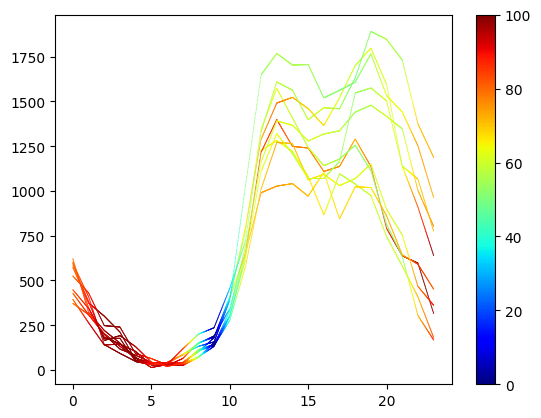

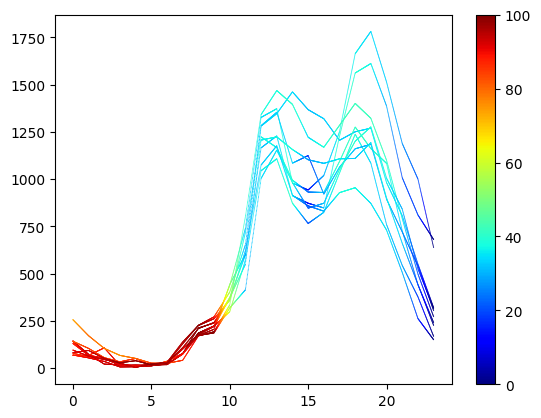

In [7]:
cam_univariate.cam_plotter(dataset)

In [8]:
trainig_weights = cam_univariate.training_weights_cam(dataset,save_weights=True)
testing_weights = cam_univariate.testing_weights_cam(dataset,save_weights=True)

2024-02-29 10:25:28.234681: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_5/beta/Assign' id:2777 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_5/beta/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_5/beta, batch_normalization_5/beta/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-02-29 10:25:28.586511: W tensorflow/c/c_api.cc:304] Operation '{name:'conv1d_2_3/bias/v/Assign' id:3415 op device:{requested: '', assigned: ''} def:{{{node conv1d_2_3/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv1d_2_3/bias/v, conv1d_2_3/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This

## Native Guides

In [9]:
model = keras.models.load_model("/Users/alanparedescetina/Tesis/Models/"+dataset+"_best_model.hdf5")
ng = native_guides.CounterfactualGenerator(dataset, model)

2024-02-29 10:25:32.672907: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_5/kernel/Assign' id:4727 op device:{requested: '', assigned: ''} def:{{{node dense_5/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_5/kernel, dense_5/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-02-29 10:25:33.093392: W tensorflow/c/c_api.cc:304] Operation '{name:'conv1d_7/bias/v/Assign' id:5007 op device:{requested: '', assigned: ''} def:{{{node conv1d_7/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv1d_7/bias/v, conv1d_7/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger

In [10]:
ng.generate_counterfactuals()

In [11]:
classes = {
    0: 'Weekend',
    1: 'Weekday'
}

In [22]:
weekday_instances = []
for i,x in enumerate(X_test):
    if np.argmax(model.predict(x.reshape(1,-1,1)),axis=1)[0] == 1:
        weekday_instances.append(i)

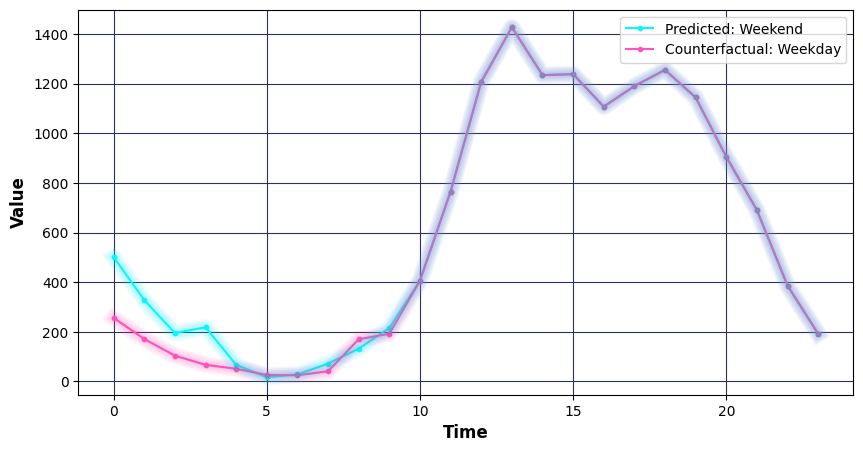

In [13]:
ng.visualize_data(0, classes)